# 모듈


In [13]:
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

from graphviz import Source
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use(['seaborn-whitegrid'])
#-*- coding:utf-8-*-

plt.rc('font', family='Malgun Gothic')

# 데이터 불러오고 날짜를 인덱스로

In [14]:
data = pd.read_csv(r"data\result\salmon_result_0.4_16.7.csv", encoding='cp949')

data['REG_DATE'] = pd.to_datetime(data['REG_DATE'])
data = data.set_index('REG_DATE')
data

,노르웨이,자사제품제조용,판매용,냉장,"냉장,포장횟감,필렛(F)",c냉장,노르웨이 자사제품제조용,노르웨이 판매용,노르웨이 냉장,"노르웨이 냉장,포장횟감,필렛(F)",...,칠레 판매용 냉장,호주 판매용 냉장,"c노르웨이 자사제품제조용 냉장,포장횟감,필렛(F)",c칠레 판매용 냉장,c호주 판매용 냉장,판매용 냉장,c판매용 냉장,두바이유,MONTH_MEAN,P_PRICE
REG_DATE,,,,,,,,,,,,,,,,,,,,,
2016-07-04,16.485792,13.230888,14.970515,10.550202,27.135952,4,13.230888,18.113243,12.415347,27.135952,...,0.000000,0.00,0,0,0,9.810252,3,45.77,14.638469,14.535608
2016-07-11,17.131105,13.731346,16.297410,12.348142,26.995579,4,13.731346,18.830984,13.466022,26.995579,...,0.000000,0.00,0,0,0,11.898422,3,42.84,14.638469,15.655894
2016-07-18,16.986936,13.503783,15.636767,11.364483,27.159698,4,13.503783,18.728512,13.275689,27.159698,...,0.000000,0.00,0,0,0,10.665025,3,43.18,14.638469,15.103521
2016-07-25,16.429329,13.403198,16.144234,11.365940,27.001421,3,13.403198,17.942394,12.573113,27.001421,...,0.000000,0.00,0,0,0,10.682812,2,42.59,14.638469,15.361081
2016-08-01,15.540317,12.808756,14.660101,10.872516,26.863082,4,12.808756,16.906098,11.576926,26.863082,...,11.154386,0.00,0,1,0,10.506224,3,38.92,14.409441,14.197264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,14.542857,11.936667,14.558000,7.060000,22.370000,3,11.936667,16.497500,7.190000,22.370000,...,6.800000,0.00,1,1,0,6.990000,2,43.39,13.751467,13.575000
2020-12-07,14.500000,11.257500,13.951667,8.386000,22.210000,5,12.010000,16.367500,7.345000,22.210000,...,7.000000,0.00,1,1,0,8.493333,3,48.23,14.650934,12.874000
2020-12-14,14.571429,11.305000,13.340000,7.670000,22.555000,5,12.073333,16.445000,7.545000,22.555000,...,7.050000,7.21,1,1,1,7.260000,3,49.46,14.650934,12.526000


In [15]:
data.columns

Index(['노르웨이', '자사제품제조용', '판매용', '냉장', '냉장,포장횟감,필렛(F)', 'c냉장', '노르웨이 자사제품제조용',
       '노르웨이 판매용', '노르웨이 냉장', '노르웨이 냉장,포장횟감,필렛(F)', '노르웨이 냉장,필렛(F)',
       '노르웨이 자사제품제조용 냉장,포장횟감,필렛(F)', '노르웨이 자사제품제조용 냉장,필렛(F)', '노르웨이 판매용 냉장',
       '노르웨이 판매용 냉장,필렛(F),횟감', '칠레 판매용 냉장', '호주 판매용 냉장',
       'c노르웨이 자사제품제조용 냉장,포장횟감,필렛(F)', 'c칠레 판매용 냉장', 'c호주 판매용 냉장', '판매용 냉장',
       'c판매용 냉장', '두바이유', 'MONTH_MEAN', 'P_PRICE'],
      dtype='object')

# 열에 있는 것들 복사해서 변수로 보고 싶은걸 cols_to_use에 넣기

In [31]:
#내가 변수라고 생각하는 열들 선택
cols_to_use = ['노르웨이', '자사제품제조용', '판매용', '냉장', '냉장,포장횟감,필렛(F)', 'c냉장', '노르웨이 자사제품제조용',
       '노르웨이 판매용', '노르웨이 냉장', '노르웨이 냉장,포장횟감,필렛(F)', '노르웨이 냉장,필렛(F)',
       '노르웨이 자사제품제조용 냉장,포장횟감,필렛(F)', '노르웨이 자사제품제조용 냉장,필렛(F)', '노르웨이 판매용 냉장',
       '노르웨이 판매용 냉장,필렛(F),횟감', '칠레 판매용 냉장', '호주 판매용 냉장',
       'c노르웨이 자사제품제조용 냉장,포장횟감,필렛(F)', 'c칠레 판매용 냉장', 'c호주 판매용 냉장', '판매용 냉장',
       'c판매용 냉장', '두바이유', 'MONTH_MEAN']
X = data[cols_to_use]

#타겟 변수는 당연 p_price
y = data["P_PRICE"]

# 데이터 나누기

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2021)

# 선형회귀모델 구축하기
## statsmodels의 OLS를 사용하여 선형회구분석 시행(Ordinary Least Squares)
## 모델선언 model=sm.OLS(Y데이터, X데이터)
## 모델학습 model_trained = model.fit()


# 선형회귀모델 가정확인하기

In [33]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

# 확률오차의 정규성확인 - 빨간석에 파란점이 모여있을수록 좋음

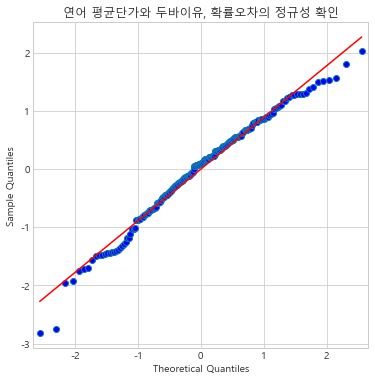

In [43]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False #음수 폰트 깨짐 방지 
fig, ax = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(6)

sm.ProbPlot(model_residuals).qqplot(line='s',color='#1177b4', ax=ax)
ax.title.set_text('연어 평균단가와 두바이유, 확률오차의 정규성 확인')

# 확률오차의 등분산성 확인 - 빨간선이 직선에 골고루 모여있으면 좋음

C:\Users\one1e\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

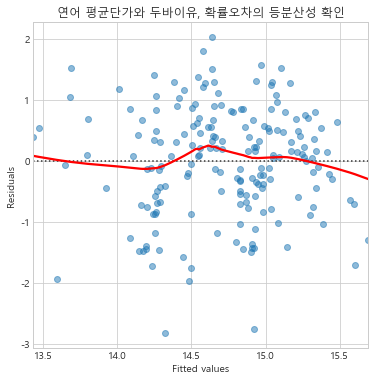

In [44]:
model_fitted_y = model_trained.fittedvalues

fig, ax = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(6)

sns.residplot(model_fitted_y,y_train,data=X_train,lowess=True, scatter_kws={'alpha':0.5},
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('연어 평균단가와 두바이유, 확률오차의 등분산성 확인')
ax.set(xlabel='Fitted values', ylabel = 'Residuals')

# 통계적으로 해석하기

## R-squared(결정계수, coefficient of determination):모형의 성능 
## coef (회귀계수) : X가 한단위 증가할때 Y의 변화량
## P>[t] (p-value): 0.05(유의수준) 이하일때 변수가 유의미 


In [36]:
print(model_trained.summary())
                                          # p >ltl 가 0.05 이하여야 변수가 유의미하다는것 ! 

                            OLS Regression Results                            
Dep. Variable:                P_PRICE   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     46.83
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           1.09e-10
Time:                        13:55:15   Log-Likelihood:                -244.89
No. Observations:                 188   AIC:                             493.8
Df Residuals:                     186   BIC:                             500.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6974      0.303     41.922      0.0

# 만약 P VALUE 값이 높다면 그것들을 제거하고 새로 모델을 만들어야

In [37]:
# model = sm.OLS(y_train, X_train.drop(['제거할열'],axis=1))
# model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                P_PRICE   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     46.83
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           1.09e-10
Time:                        13:55:15   Log-Likelihood:                -244.89
No. Observations:                 188   AIC:                             493.8
Df Residuals:                     186   BIC:                             500.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6974      0.303     41.922      0.0

# XGBoost의 변수중요도 판단 - 위에 데이터 나눈걸로 그대로사용



In [38]:
xgbr = XGBRegressor(n_estimators=400, learning_rate = 0.1, max_depth=3, objective=
                'reg:squarederror')
xgbr.fit(X_train, y_train)
# preds = xgbr.predict(X_test)   

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
cross_val = cross_validate(
    estimator = xgbr,
    X = X_train, y=y_train,
    cv =5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.11733860969543457 (+/- 0.0022457322908212706)
avg score time: 0.0030005455017089845 (+/- 5.519789172549355e-07)
avg test score: 0.03930690483553736 (+/- 0.16938173408531468)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

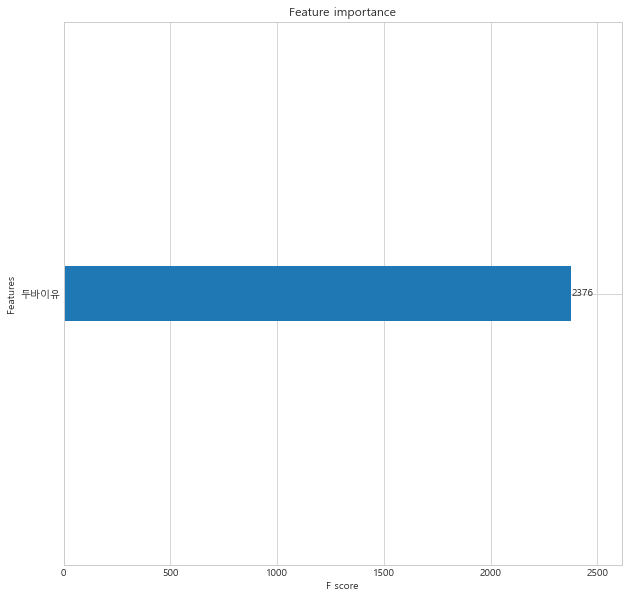

In [40]:
fig, ax = plt.subplots(figsize =(10,10))
plot_importance(xgbr, ax=ax)

# 중요도가 낮아도 유의미한 변수면 된거임

# RMSE 로 평가 -  밑에 두줄만 있으면 어느떄나 사용가능

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
#print(np.sqrt(mean_squared_error(실제값, 예측값))